In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [12]:
df = pd.read_csv("./result.csv")

In [13]:
dfs = [df_sub for _, df_sub in df.groupby("extra_tags")]
len(dfs)

2

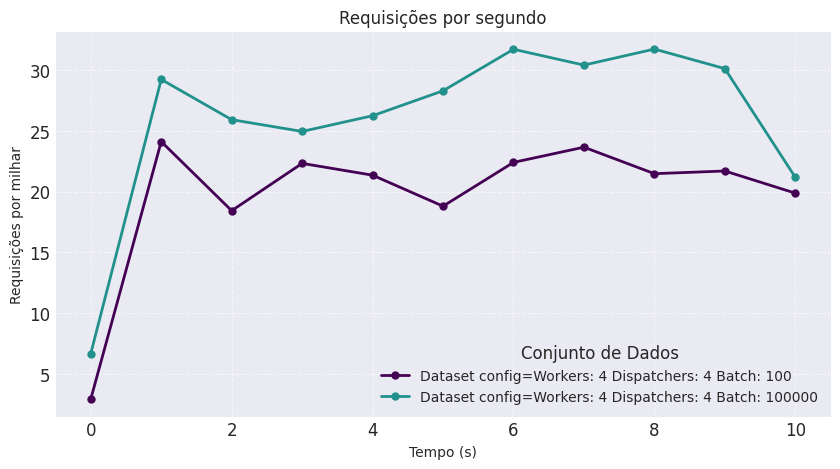

In [64]:
plt.style.use('seaborn-v0_8-darkgrid')  # Aplicar um estilo bonito
plt.figure(figsize=(10, 5))  # Definir o tamanho do gráfico

for i, df in enumerate(dfs):
    df['timestamp'] = df['timestamp'] - df['timestamp'].min()
    df_filtrado = df[df["metric_name"] == "http_reqs"]
    df_grouped = df_filtrado.groupby("timestamp")["metric_value"].sum()

    label = df["extra_tags"].iloc[0] if not df["extra_tags"].empty else f"Dataset {i+1}"

    color = plt.cm.viridis(i / len(dfs))

    plt.plot(df_grouped.index, df_grouped.values / 1000,
             marker="o", linestyle="-", linewidth=2, markersize=5,
             label=f"Dataset {label}", color=color)

plt.xlabel("Tempo (s)", fontsize=10)
plt.ylabel("Requisições por milhar", fontsize=10)
plt.title("Requisições por segundo", fontsize=12)
plt.legend(title="Conjunto de Dados", fontsize=10)
plt.grid(linestyle="--", alpha=0.6)

plt.show()


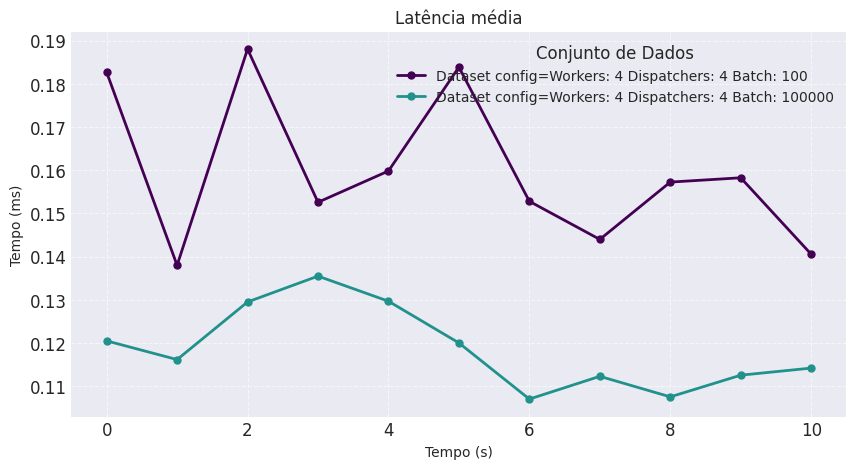

In [81]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 5))

for i, df in enumerate(dfs):
    df['timestamp'] = df['timestamp'] - df['timestamp'].min()
    df_filtrado = df[df["metric_name"] == "http_req_duration"]
    df_grouped = df_filtrado.groupby("timestamp")["metric_value"].mean()

    label = df["extra_tags"].iloc[0] if not df["extra_tags"].empty else f"Dataset {i+1}"

    color = plt.cm.viridis(i / len(dfs))

    plt.plot(df_grouped.index, df_grouped.values,
             marker="o", linestyle="-", linewidth=2, markersize=5,
             label=f"Dataset {label}", color=color)

plt.xlabel("Tempo (s)", fontsize=10)
plt.ylabel("Tempo (ms)", fontsize=10)
plt.title("Latência média", fontsize=12)
plt.legend(title="Conjunto de Dados", fontsize=10)
plt.grid(linestyle="--", alpha=0.6)

plt.show()